# **COMPREHENSIVE DATA EXPLORATION**

## **Problem Description**

**Housing Prices Competition for Kaggle Learn Users**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But, this payground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

The detail data can be found in [here](https://www.kaggle.com/c/home-data-for-ml-course/overview)

## **Summary Activity**

1. **Understand the problem:** We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. **Univariable study:** We'll just focus on the dependent variable `SalePrice` and try to knnow a little bit more about it.
3. **Multivariate study:** We'll try to understand how the dependent variable and independent variables relate.
4. **Basic cleaning:** We'll clean the dataset and handle the missing data, outliners and categorical variables.
5. **Test assumptions:** We'll check if our data meets the assumptionns required by most multivariate techniques.

[link detail material](https://www.kaggle.com/bachtiarherdianto/comprehensive-data-exploration-with-python/edit) 

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings

sns.set()
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import drive    # mounting file to Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/source.csv")
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Full Data Description

1. `MSSubClass` : Identifies the type of dwelling involved in the sale.	
> - `20`  :	1-STORY 1946 & NEWER ALL STYLES
> - `30`  :	1-STORY 1945 & OLDER
> - `40`  :	1-STORY W/FINISHED ATTIC ALL AGES
> - `45`  :	1-1/2 STORY - UNFINISHED ALL AGES
> - `50`  :	1-1/2 STORY FINISHED ALL AGES
> - `60`  :	2-STORY 1946 & NEWER
> - `70`  :	2-STORY 1945 & OLDER
> - `75`  :	2-1/2 STORY ALL AGES
> - `80`  :	SPLIT OR MULTI-LEVEL
> - `85`  :	SPLIT FOYER
> - `90`  :	DUPLEX - ALL STYLES AND AGES
> - `120` :	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
> - `150` :	1-1/2 STORY PUD - ALL AGES
> - `160` :	2-STORY PUD - 1946 & NEWER
> - `180` :	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
> - `190` :	2 FAMILY CONVERSION - ALL STYLES AND AGES
2. `MSZoning` : Identifies the general zoning classification of the sale.
> - `A`  :	Agriculture
> - `C`  :	Commercial
> - `FV` :	Floating Village Residential
> - `I`  :	Industrial
> - `RH` :	Residential High Density
> - `RL` :	Residential Low Density
> - `RP` :	Residential Low Density Park 
> - `RM` :	Residential Medium Density
3. `LotFrontage` : Linear feet of street connected to property
4. `LotArea`: Lot size in square feet
5. `Street`: Type of road access to property
> - `Grvl` :	Gravel	
> - `Pave` :	Paved
6. `Alley` : Type of alley access to property
> - `Grvl` :	Gravel
> - `Pave` :	Paved
> - `NA`   : 	No alley access
7. `LotShape` : General shape of property
> - `Reg` :	Regular	
> - `IR1` :	Slightly irregular
> - `IR2` :	Moderately Irregular
> - `IR3` :	Irregular
8. `LandContour` : Flatness of the property
> - `Lvl` :	Near Flat/Level	
> - `Bnk` :	Banked - Quick and significant rise from street grade to building
> - `HLS` :	Hillside - Significant slope from side to side
> - `Low` :	Depression
9. `Utilities` : Type of utilities available
> - `AllPub` :	All public Utilities (E,G,W,& S)	
> - `NoSewr` :	Electricity, Gas, and Water (Septic Tank)
> - `NoSeWa` :	Electricity and Gas Only
> - `ELO`    :	Electricity only	
10. `LotConfig` : Lot configuration
> - `Inside`  :	Inside lot
> - `Corner`  :	Corner lot
> - `CulDSac` :	Cul-de-sac
> - `FR2`     :	Frontage on 2 sides of property
> - `FR3`     :	Frontage on 3 sides of property
11. `LandSlope` : Slope of property
> - `Gtl` :	Gentle slope
> - `Mod` :	Moderate Slope	
> - `Sev` :	Severe Slope
12. `Neighborhood` : Physical locations within Ames city limits
> - `Blmngtn` :	Bloomington Heights
> - `Blueste` :	Bluestem
> - `BrDale`  :	Briardale
> - `BrkSide` :	Brookside
> - `ClearCr` :	Clear Creek
> - `CollgCr` :	College Creek
> - `Crawfor` :	Crawford
> - `Edwards` :	Edwards
> - `Gilbert` :	Gilbert
> - `IDOTRR`  :	Iowa DOT and Rail Road
> - `MeadowV` :	Meadow Village
> - `Mitchel` :	Mitchell
> - `Names` :North Ames
> - `NoRidge` :	Northridge
> - `NPkVill` :	Northpark Villa
> - `NridgHt` :	Northridge Heights
> - `NWAmes`  :	Northwest Ames
> - `OldTown` :	Old Town
> - `SWISU`   :South & West of Iowa State University
> - `Sawyer`  :	Sawyer
> - `SawyerW` :	Sawyer West
> - `Somerst` :	Somerset
> - `StoneBr` :	Stone Brook
> - `Timber`  :	Timberland
> - `Veenker` :	Veenker
13. `Condition1` : Proximity to various conditions
> - `Artery` :	Adjacent to arterial street
> - `Feedr`  :	Adjacent to feeder street	
> - `Norm`   :	Normal	
> - `RRNn`   :	Within 200' of North-South Railroad
> - `RRAn`   :	Adjacent to North-South Railroad
> - `PosN`   :	Near positive off-site feature--park, greenbelt, etc.
> - `PosA`   :	Adjacent to postive off-site feature
> - `RRNe`   :	Within 200' of East-West Railroad
> - `RRAe`   :	Adjacent to East-West Railroad
14. `Condition2` : Proximity to various conditions (if more than one is present)
> - `Artery` :	Adjacent to arterial street
> - `Feedr`  :	Adjacent to feeder street	
> - `Norm`   :	Normal	
> - `RRNn`   :	Within 200' of North-South Railroad
> - `RRAn`   :	Adjacent to North-South Railroad
> - `PosN`   :	Near positive off-site feature--park, greenbelt, etc.
> - `PosA`   :	Adjacent to postive off-site feature
> - `RRNe`   :	Within 200' of East-West Railroad
> - `RRAe`   :	Adjacent to East-West Railroad
15. `BldgType` : Type of dwelling
> - `1Fam`   :	Single-family Detached	
> - `2FmCon` :	Two-family Conversion; originally built as one-family dwelling
> - `Duplx`  :	Duplex
> - `TwnhsE` :	Townhouse End Unit
> - `TwnhsI` :	Townhouse Inside Unit
16. `HouseStyle` : Style of dwelling
> - `1Story` :	One story
> - `1.5Fin` :	One and one-half story: 2nd level finished
> - `1.5Unf` :	One and one-half story: 2nd level unfinished
> - `2Story` :	Two story
> - `2.5Fin` :	Two and one-half story: 2nd level finished
> - `2.5Unf` :	Two and one-half story: 2nd level unfinished
> - `SFoyer` :	Split Foyer
> - `SLvl`   :	Split Level	
17. `OverallQual` : Rates the overall material and finish of the house
> - `10` :	Very Excellent
> - `9`  :	Excellent
> - `8`  :	Very Good
> - `7`  :	Good
> - `6`  :	Above Average
> - `5`  :	Average
> - `4`  :	Below Average
> - `3`  :	Fair
> - `2`  :	Poor
> - `1`  :	Very Poor
18. `OverallCond` : Rates the overall condition of the house
> - `10` :	Very Excellent
> - `9`  :	Excellent
> - `8`  :	Very Good
> - `7`  :	Good
> - `6`  :	Above Average	
> - `5`  :	Average
> - `4`  :	Below Average	
> - `3`  :	Fair
> - `2`  :	Poor
> - `1`  :	Very Poor	
19. `YearBuilt` : Original construction date
20. `YearRemodAdd` : Remodel date (same as construction date if no remodeling or additions)
21. `RoofStyle` : Type of roof
> - `Flat`	  : Flat
> - `Gable`	  : Gable
> - `Gambrel` :	Gabrel (Barn)
> - `Hip`	  : Hip
> - `Mansard` : Mansard
> - `Shed`	  : Shed	
22. `RoofMatl` : Roof material
> - `ClyTile` :	Clay or Tile
> - `CompShg` :	Standard (Composite) Shingle
> - `Membran` :	Membrane
> - `Metal`   :	Metal
> - `Roll`    :	Roll
> - `Tar&Grv` :	Gravel & Tar
> - `WdShake` :	Wood Shakes
> - `WdShngl` :	Wood Shingles	
23. `Exterior1st` : Exterior covering on house
> - `AsbShng` :	Asbestos Shingles
> - `AsphShn` :	Asphalt Shingles
> - `BrkComm` :	Brick Common
> - `BrkFace` :	Brick Face
> - `CBlock`  :	Cinder Block
> - `CemntBd` :	Cement Board
> - `HdBoard` :	Hard Board
> - `ImStucc` :	Imitation Stucco
> - `MetalSd` :	Metal Siding
> - `Other`   :	Other
> - `Plywood` :	Plywood
> - `PreCast` :	PreCast	
> - `Stone`   :	Stone
> - `Stucco`  :	Stucco
> - `VinylSd` :	Vinyl Siding
> - `Wd Sdng` :	Wood Siding
> - `WdShing` :	Wood Shingles
24. `Exterior2nd` : Exterior covering on house (if more than one material)
> - `AsbShng` :	Asbestos Shingles
> - `AsphShn` :	Asphalt Shingles
> - `BrkComm` :	Brick Common
> - `BrkFace` :	Brick Face
> - `CBlock`  : Cinder Block
> - `CemntBd` :	Cement Board
> - `HdBoard` :	Hard Board
> - `ImStucc` :	Imitation Stucco
> - `MetalSd` :	Metal Siding
> - `Other`   :	Other
> - `Plywood` :	Plywood
> - `PreCast` :	PreCast
> - `Stone`   :	Stone
> - `Stucco`  :	Stucco
> - `VinylSd` :	Vinyl Siding
> - `Wd Sdng` :	Wood Siding
> - `WdShing` :	Wood Shingles
25. `MasVnrType` : Masonry veneer type
> - `BrkCmn`  :	Brick Common
> - `BrkFace` :	Brick Face
> - `CBlock`  :	Cinder Block
> - `None`    :	None
> - `Stone`   :	Stone
26. `MasVnrArea` : Masonry veneer area in square feet
27. `ExterQual` : Evaluates the quality of the material on the exterior 
> - `Ex` :	Excellent
> - `Gd` :	Good
> - `TA` :	Average/Typical
> - `Fa` :	Fair
> - `Po` :	Poor
28. `ExterCond` : Evaluates the present condition of the material on the exterior
> - `Ex` :	Excellent
> - `Gd` :	Good
> - `TA` :	Average/Typical
> - `Fa` :	Fair
> - `Po` :	Poor
29. `Foundation` : Type of foundation
> - `BrkTil` : Brick & Tile
> - `CBlock` : Cinder Block
> - `PConc`  : Poured Contrete	
> - `Slab`   : Slab
> - `Stone`  : Stone
> - `Wood`   : Wood
30. `BsmtQual` : Evaluates the height of the basement
> - `Ex` :	Excellent (100+ inches)	
> - `Gd` :	Good (90-99 inches)
> - `TA` :	Typical (80-89 inches)
> - `Fa` :	Fair (70-79 inches)
> - `Po` :	Poor (<70 inches
> - `NA` :	No Basement
31. `BsmtCond` : Evaluates the general condition of the basement
> - `Ex` :	Excellent
> - `Gd` :	Good
> - `TA` :	Typical - slight dampness allowed
> - `Fa` :	Fair - dampness or some cracking or settling
> - `Po` :	Poor - Severe cracking, settling, or wetness
> - `NA` :	No Basement
32. `BsmtExposure` : Refers to walkout or garden level walls
> - `Gd` :	Good Exposure
> - `Av` :	Average Exposure (split levels or foyers typically score average or above)	
> - `Mn` :	Mimimum Exposure
> - `No` :	No Exposure
> - `NA` :	No Basement
33. `BsmtFinType1` : Rating of basement finished area
> - `GLQ` :	Good Living Quarters
> - `ALQ` :	Average Living Quarters
> - `BLQ` :	Below Average Living Quarters	
> - `Rec` :	Average Rec Room
> - `LwQ` :	Low Quality
> - `Unf` :	Unfinshed
> - `NA`  :	No Basement
34. `BsmtFinSF1` : Type 1 finished square feet
35. `BsmtFinType2` : Rating of basement finished area (if multiple types)
> - `GLQ` :	Good Living Quarters
> - `ALQ` :	Average Living Quarters
> - `BLQ` :	Below Average Living Quarters	
> - `Rec` :	Average Rec Room
> - `LwQ` :	Low Quality
> - `Unf` :	Unfinshed
> - `NA`  :	No Basement
36. `BsmtFinSF2` : Type 2 finished square feet
37. `BsmtUnfSF` : Unfinished square feet of basement area
38. `TotalBsmtSF` : Total square feet of basement area
39. `Heating` : Type of heating
> - `Floor` :	Floor Furnace
> - `GasA`  :	Gas forced warm air furnace
> - `GasW`  :	Gas hot water or steam heat
> - `Grav`  :	Gravity furnace	
> - `OthW`  :	Hot water or steam heat other than gas
> - `Wall`  :	Wall furnace
40. `HeatingQC` : Heating quality and condition
> - `Ex` :	Excellent
> - `Gd` :	Good
> - `TA` :	Average/Typical
> - `Fa` :	Fair
> - `Po` :	Poor
41. `CentralAir` : Central air conditioning
> - `N` : No
> - `Y`	: Yes
42. `Electrical` : Electrical system
> - `SBrkr` :	Standard Circuit Breakers & Romex
> - `FuseA` :	Fuse Box over 60 AMP and all Romex wiring (Average)	
> - `FuseF` :	60 AMP Fuse Box and mostly Romex wiring (Fair)
> - `FuseP` :	60 AMP Fuse Box and mostly knob & tube wiring (poor)
> - `Mix`   :	Mixed
43. `1stFlrSF` : First Floor square feet
44. `2ndFlrSF` : Second floor square feet
45. `LowQualFinSF` : Low quality finished square feet (all floors)
46. `GrLivArea` : Above grade (ground) living area square feet
47. `BsmtFullBath` : Basement full bathrooms
48. `BsmtHalfBath` : Basement half bathrooms
49. `FullBath` : Full bathrooms above grade
50. `HalfBath` : Half baths above grade
51. `Bedroom` : Bedrooms above grade (does NOT include basement bedrooms)
52. `Kitchen` : Kitchens above grade
53. `KitchenQual` : Kitchen quality
> - `Ex` :	Excellent
> - `Gd` :	Good
> - `TA` :	Typical/Average
> - `Fa` :	Fair
> - `Po` :	Poor
54. `TotRmsAbvGrd` : Total rooms above grade (does not include bathrooms)
55. `Functional` : Home functionality (Assume typical unless deductions are warranted)
> - `Typ`  : 	Typical Functionality
> - `Min1` :	Minor Deductions 1
> - `Min2` :	Minor Deductions 2
> - `Mod`  :	Moderate Deductions
> - `Maj1` :	Major Deductions 1
> - `Maj2` :	Major Deductions 2
> - `Sev`  :	Severely Damaged
> - `Sal`  :	Salvage only
56. `Fireplaces` : Number of fireplaces
57. `FireplaceQu` : Fireplace quality
> - `Ex` :	Excellent - Exceptional Masonry Fireplace
> - `Gd` :	Good - Masonry Fireplace in main level
> - `TA` :	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
> - `Fa` :	Fair - Prefabricated Fireplace in basement
> - `Po` :	Poor - Ben Franklin Stove
> - `NA` :	No Fireplace
58. `GarageType` : Garage location
> - `2Types`  :	More than one type of garage
> - `Attchd`  :	Attached to home
> - `Basment` :	Basement Garage
> - `BuiltIn` :	Built-In (Garage part of house - typically has room above garage)
> - `CarPort` :	Car Port
> - `Detchd`  :	Detached from home
> - `NA`      :	No Garage
59. `GarageYrBlt`  : Year garage was built
60. `GarageFinish` : Interior finish of the garage
> - `Fin` :	Finished
> - `RFn` :	Rough Finished	
> - `Unf` :	Unfinished
> - `NA`  :	No Garage
61. `GarageCars` : Size of garage in car capacity
62. `GarageArea` : Size of garage in square feet
63. `GarageQual` : Garage quality
> - `Ex` :	Excellent
> - `Gd` :	Good
> - `TA` :	Typical/Average
> - `Fa` :	Fair
> - `Po` :	Poor
> - `NA` :	No Garage
64. `GarageCond`  : Garage condition
> - `Ex` :	Excellent
> - `Gd` :	Good
> - `TA` :	Typical/Average
> - `Fa` :	Fair
> - `Po` :	Poor
> - `NA` :	No Garage
65. `PavedDrive` : Paved driveway
> - `Y` :	Paved 
> - `P` :	Partial Pavement
> - `N` :	Dirt/Gravel
66. `WoodDeckSF` : Wood deck area in square feet
67. `OpenPorchSF` : Open porch area in square feet
68. `EnclosedPorch` : Enclosed porch area in square feet
69. `3SsnPorch` : Three season porch area in square feet
70. `ScreenPorch` : Screen porch area in square feet
71. `PoolArea` : Pool area in square feet
72. `PoolQC` : Pool quality
> - `Ex` :	Excellent
> - `Gd` :	Good
> - `TA` :	Average/Typical
> - `Fa` :	Fair
> - `NA` :	No Pool
73. `Fence` : Fence quality
> - `GdPrv` : Good Privacy
> - `MnPrv` : Minimum Privacy
> - `GdWo`  : Good Wood
> - `MnWw`  : Minimum Wood/Wire
> - `NA`    : No Fence
74. `MiscFeature` : Miscellaneous feature not covered in other categories
> - `Elev` :	Elevator
> - `Gar2` :	2nd Garage (if not described in garage section)
> - `Othr` :	Other
> - `Shed` :	Shed (over 100 SF)
> - `TenC` :	Tennis Court
> - `NA`   :	None
75. `MiscVal` : Value of miscellaneous feature
76. `MoSold` : Month Sold (MM)
77. `YrSold` : Year Sold (YYYY)
78. `SaleType` : Type of sale
> - `WD`    : 	Warranty Deed - Conventional
> - `CWD`   :	Warranty Deed - Cash
> - `VWD`   :	Warranty Deed - VA Loan
> - `New`   :	Home just constructed and sold
> - `COD`   :	Court Officer Deed/Estate
> - `Con`   :	Contract 15% Down payment regular terms
> - `ConLw` :	Contract Low Down payment and low interest
> - `ConLI` :	Contract Low Interest
> - `ConLD` :	Contract Low Down
> - `Oth`   :	Other
79. `SaleCondition` : Condition of sale
> - `Normal`  :	Normal Sale
> - `Abnorml` :	Abnormal Sale -  trade, foreclosure, short sale
> - `AdjLand` :	Adjoining Land Purchase
> - `Alloca`  :	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
> - `Family`  :	Sale between family members
> - `Partial` :	Home was not completed when last assessed (associated with New Homes)

In [ ]:
df_train[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType']].dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
dtype: object

In [ ]:
df_train[['HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']].dtypes

HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
dtype: object

In [ ]:
df_train[['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF']].dtypes

BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinSF1       int64
BsmtFinType2    object
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
Heating         object
HeatingQC       object
CentralAir      object
Electrical      object
1stFlrSF         int64
2ndFlrSF         int64
dtype: object

In [ ]:
df_train[['LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType']].dtypes

LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
KitchenQual     object
TotRmsAbvGrd     int64
Functional      object
Fireplaces       int64
FireplaceQu     object
GarageType      object
dtype: object

In [ ]:
df_train[['GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC']].dtypes

GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
GarageArea         int64
GarageQual        object
GarageCond        object
PavedDrive        object
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
PoolQC            object
dtype: object

In [ ]:
df_train[['Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']].dtypes

Fence            object
MiscFeature      object
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
dtype: object

## **Pre-Analysis**

- Get dimension of all datasets
- Analyze unique value of all datasets
- Analyze duplicate value of all datasets
- Analyze missiing value of all datasets

In [ ]:
# class to do preanalysis of all dataset
class PreProcessing:
  def __init__(self, dataframe):
    self.dataframe = dataframe
  
  # method to get infomration about shape of the dataset
  def get_shape(self):
    print("  Total number of row in the dataset is {}".format(self.dataframe.shape[0]))
    print("  Total number of column in the dataset is {}".format(self.dataframe.shape[1]))

  # method to identify duplicate value in the dataset
  def identifies_duplicate(self):
    list_column = list(self.dataframe.columns)
    for i in list_column:
      print("  Total number of duplicated value for column {} is {}".format(i, sum(self.dataframe[i].duplicated())))
      if (sum(self.dataframe[i].duplicated()) == 0):  # if the duplicate value == 0
        print("  - there is no duplicate value in column {}".format(i))
  
  # method to calculate unique value in the dataset
  def identifies_unique(self):
    list_column = list(self.dataframe.columns)
    for i in list_column:
      print("  Total number of unique value for column {} is {}".format(i, self.dataframe[i].nunique()))
      if (self.dataframe[i].nunique() == self.dataframe[i].shape[0]): # if all value in the column is unique value
        print("  - all values in column {} is unique value".format(i))

  # method to calculate null value in all column of the dataset
  def identifies_null(self):
    list_column = list(self.dataframe.columns)
    row_count = 0
    for i in list_column:
      null_count = self.dataframe[i].isnull().sum()
      if (null_count != 0):
        print("  For column {}, there are any {} row of null value".format(i, null_count))
        row_count += 1
    
    if (row_count == 0):
      print("  All data complete, there is no null value")
    
    if (row_count == self.dataframe[i].shape[0]):
      print("  - column {} is empty".format(i))

In [ ]:
print("Load and analysis for dataset")
df = df_train                       # load dataframe
analysis_df = PreProcessing(df)     # initialize object
print("> Get dimension of dataset -------------------------------------------------------------------------")
analysis_df.get_shape()
print("\n> Identify duplicate value in the dataset ----------------------------------------------------------")
analysis_df.identifies_duplicate()
print("\n> Calculate unique value in the dataset ------------------------------------------------------------")
analysis_df.identifies_unique()
print("\n> Analysis of null value of dataset ----------------------------------------------------------------")
analysis_df.identifies_null()

Load and analysis for dataset
> Get dimension of dataset -------------------------------------------------------------------------
  Total number of row in the dataset is 1460
  Total number of column in the dataset is 81

> Identify duplicate value in the dataset ----------------------------------------------------------
  Total number of duplicated value for column Id is 0
  - there is no duplicate value in column Id
  Total number of duplicated value for column MSSubClass is 1445
  Total number of duplicated value for column MSZoning is 1455
  Total number of duplicated value for column LotFrontage is 1349
  Total number of duplicated value for column LotArea is 387
  Total number of duplicated value for column Street is 1458
  Total number of duplicated value for column Alley is 1457
  Total number of duplicated value for column LotShape is 1456
  Total number of duplicated value for column LandContour is 1456
  Total number of duplicated value for column Utilities is 1458
  Total 

## **So, What Can We Expect?**

In order to understand the data, we can look at each variable and try to unnderstaand their meaning and relevance to this problem. This will give use the flavour of the dataset.

First things first, we'll analyze following variables:
- `ExterQual` : Evaluates the quality of the material on the exterior 
> - `Ex` : Excellent
> - `Gd` : Good
> - `TA` : Average/Typical
> - `Fa` : Fair
> - `Po` : Poor
- `ExterCond` : Evaluates the present condition of the material on the exterior
> - `Ex` : Excellent
> - `Gd` : Good
> - `TA` : Average/Typical
> - `Fa` : Fair
> - `Po` : Poor

In [ ]:
def pie_chart(dataframe, variable, title):
  df = dataframe
  df["freq"] = 1
  tmp = df.groupby(variable)["freq"].sum()/df.shape[0] * 100
  tmp.plot.pie(autopct='%1.2f%%', labels=["" for i in range(df.shape[0])], wedgeprops={'alpha':0.6})
  plt.legend(bbox_to_anchor=(0, 1), labels=tmp.index)
  plt.title(title)

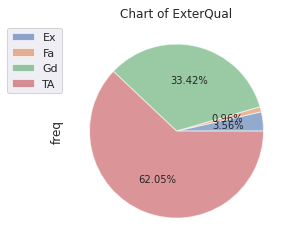

In [ ]:
pie_chart(df_train, "ExterQual", "Chart of ExterQual")

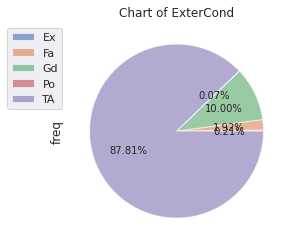

In [ ]:
pie_chart(df_train, "ExterCond", "Chart of ExterCond")

Following some conclusion about some variables can play an important role for this problem:
- `OverallQual` : rates the overall material and finish ot the house
- `YearBuilt` : original construction date
- `TotalBsmtSF` : total square feet of basement area
- `GrLivArea` : above grade (ground) living area square feet

In [ ]:
df_train[["OverallQual", "YearBuilt", "TotalBsmtSF", "GrLivArea"]].head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea
0,7,2003,856,1710
1,6,1976,1262,1262
2,7,2001,920,1786
3,7,1915,756,1717
4,8,2000,1145,2198


In [ ]:
def bar_chart(dataframe, variable, title):
  df = dataframe
  df["freq"] = 1
  tmp = df.groupby(variable)["freq"].sum()/df.shape[0] * 100
  tmp.plot.bar(x=[i for i in tmp.index], y="data", rot=0, figsize=(6, 4))
  plt.title(title)

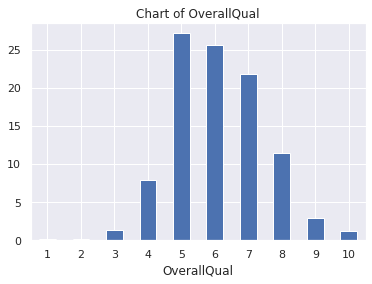

In [ ]:
bar_chart(df_train, "OverallQual", "Chart of OverallQual")

In [ ]:
def histogram(dataframe, variable, title):
  sns.distplot(dataframe[variable])
  plt.title(title)

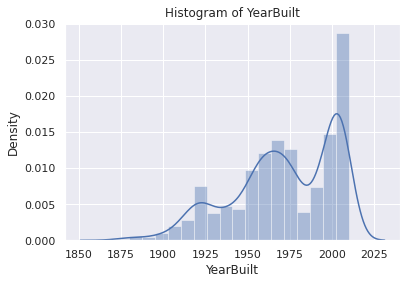

In [ ]:
histogram(df_train, "YearBuilt", "Histogram of YearBuilt")

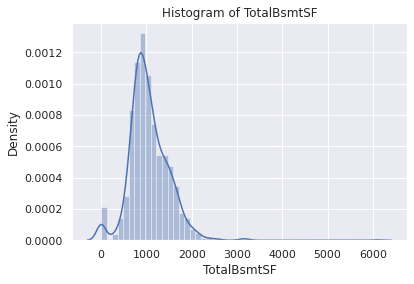

In [ ]:
histogram(df_train, "TotalBsmtSF", "Histogram of TotalBsmtSF")

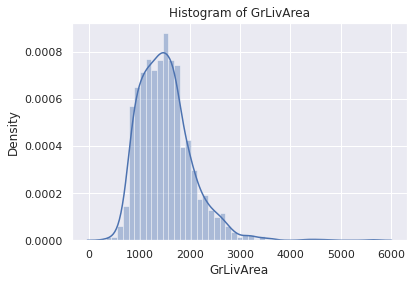

In [ ]:
histogram(df_train, "GrLivArea", "Histogram of GrLivArea")

## **Analyzing 'SalePrice'**

### First of all, data's distribution analysis

In [ ]:
# descriptive statistics summary
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

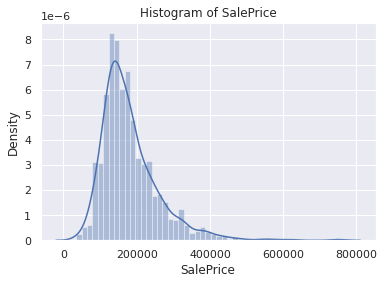

In [ ]:
histogram(df_train, "SalePrice", "Histogram of SalePrice")

From the analysis, we see that `SalePrice`:
- deviate from the normal distribution
- have appreciable positive skewness
- show peakedness

In [ ]:
# body measure of SalePrice
# skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
# kurtosis is a measure of the tailedness of the probability distribution of a real-valued random variable
print("Skewness: %.3f"%df_train["SalePrice"].skew())
print("Kurtosis: %.3f"%df_train["SalePrice"].kurt())

Skewness: 1.883
Kurtosis: 6.536


### Is SalePrice still have normal distribution?

In [ ]:
def normality_test(dataframe, variable, sample_size):
  if sample_size > dataframe.shape[0]:
    print("Sample size is larger than data size")
    return

  # H0: It's likely that variable is normally distribute
  # H1: It's unlikely that the variable is normally distributed
  # Accept H0 if p-value >= alpha
  value, p = stats.normaltest(dataframe[variable].sample(sample_size))
  print("> variable :", variable)
  print("> p-value  : %.3f"%p)
  if (p >= 0.05):
    print("It's likely that variable is normally distributed")
  else:
    print("It's unlikely that the variable is normally distributed")

In [ ]:
normality_test(df_train, "SalePrice", 30)

> variable : SalePrice
> p-value  : 0.001
It's unlikely that the variable is normally distributed


### Relationship with numerical variables

In [ ]:
def detail_numerical_correlation(dataframe, x_axis, y_axis, title):
  sns.lmplot(x=x_axis, y=y_axis, data=dataframe)
  coef = stats.pearsonr(dataframe[x_axis], dataframe[y_axis])
  print(title)
  print("Pearson's r : %.3f"%coef[0])
  print("p-value     : %.3f"%coef[1])

GrLivArea v.s. SalePrice
Pearson's r : 0.709
p-value     : 0.000


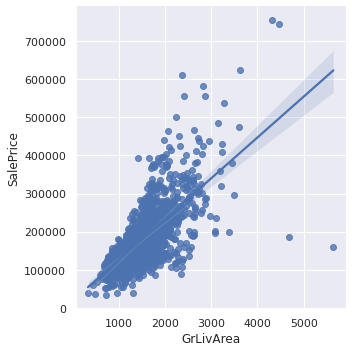

In [ ]:
detail_numerical_correlation(df_train, "GrLivArea", "SalePrice", "GrLivArea v.s. SalePrice")

TotalBsmtSF v.s. SalePrice
Pearson's r : 0.614
p-value     : 0.000


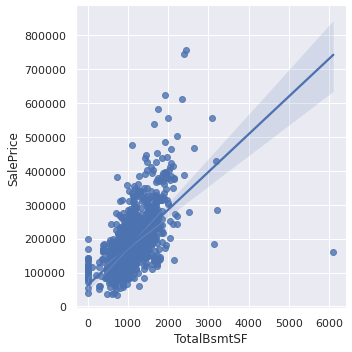

In [ ]:
detail_numerical_correlation(df_train, "TotalBsmtSF", "SalePrice", "TotalBsmtSF v.s. SalePrice")

### Relationship with categorical features

In [ ]:
def detail_categorical_correlation(dataframe, x_axis, y_axis, title):
  sns.boxplot(x=x_axis, y=y_axis, data=dataframe)
  coef = stats.pearsonr(dataframe[x_axis], dataframe[y_axis])
  print(title)
  print("Pearson's r : %.3f"%coef[0])
  print("p-value     : %.3f"%coef[1])

OverallQual v.s. SalePrice
Pearson's r : 0.791
p-value     : 0.000


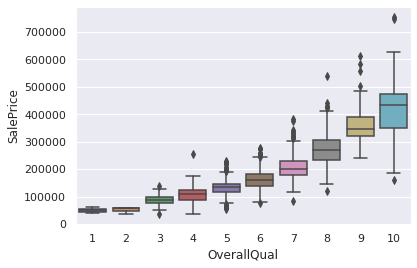

In [ ]:
detail_categorical_correlation(df_train, "OverallQual", "SalePrice", "OverallQual v.s. SalePrice")

YearBuilt v.s. SalePrice
Pearson's r : 0.523
p-value     : 0.000


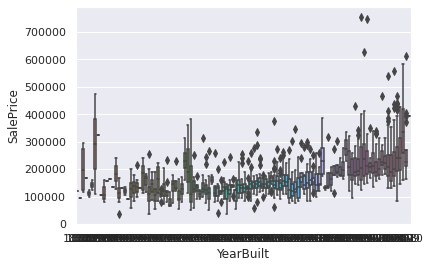

In [ ]:
detail_categorical_correlation(df_train, "YearBuilt", "SalePrice", "YearBuilt v.s. SalePrice")

### Write Up

From before analysis, we can conclude that:
- First things first, `GrLivArea` and `TotalBsmtSF` seem to be linearly related with `SalePrice`. Both relationship are positive, which means that as one variable increases, the other also increases. In the case of `TotalBsmtSF`, we can see that the slope of the linear relationship is particularly high.
- Secondly, `OverallQual` and `YearBuilt` also seem to be related with `SalePrice`. The relationship seems to be stringer in the case of `OverallQual`, where the box plot shows how `SalePrice` increase with `OveralQual`.

**Note:** we just analyzed four variables, but there are many other that we should analyse. The trict here seems to be the choice of the right features *(a.k.a feature selection)* and not the definition of complex relationships between them *(a.k.a feature engineering)*.

## **Advance Analysis**

### Correlation matrix

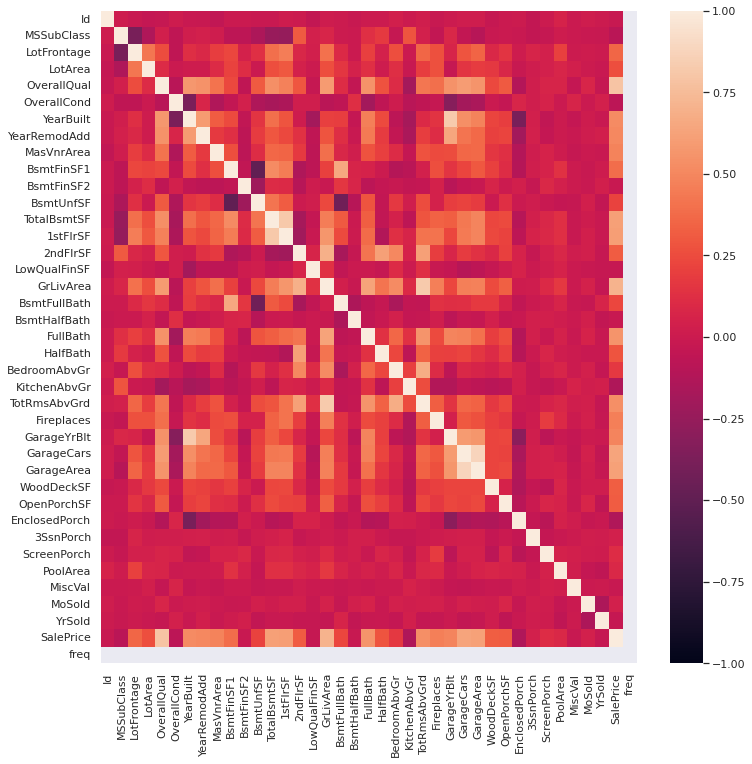

In [ ]:
overall_corr = df_train.corr()
plt.subplots(figsize=(12, 12))
sns.heatmap(overall_corr, vmin = -1, vmax = 1);

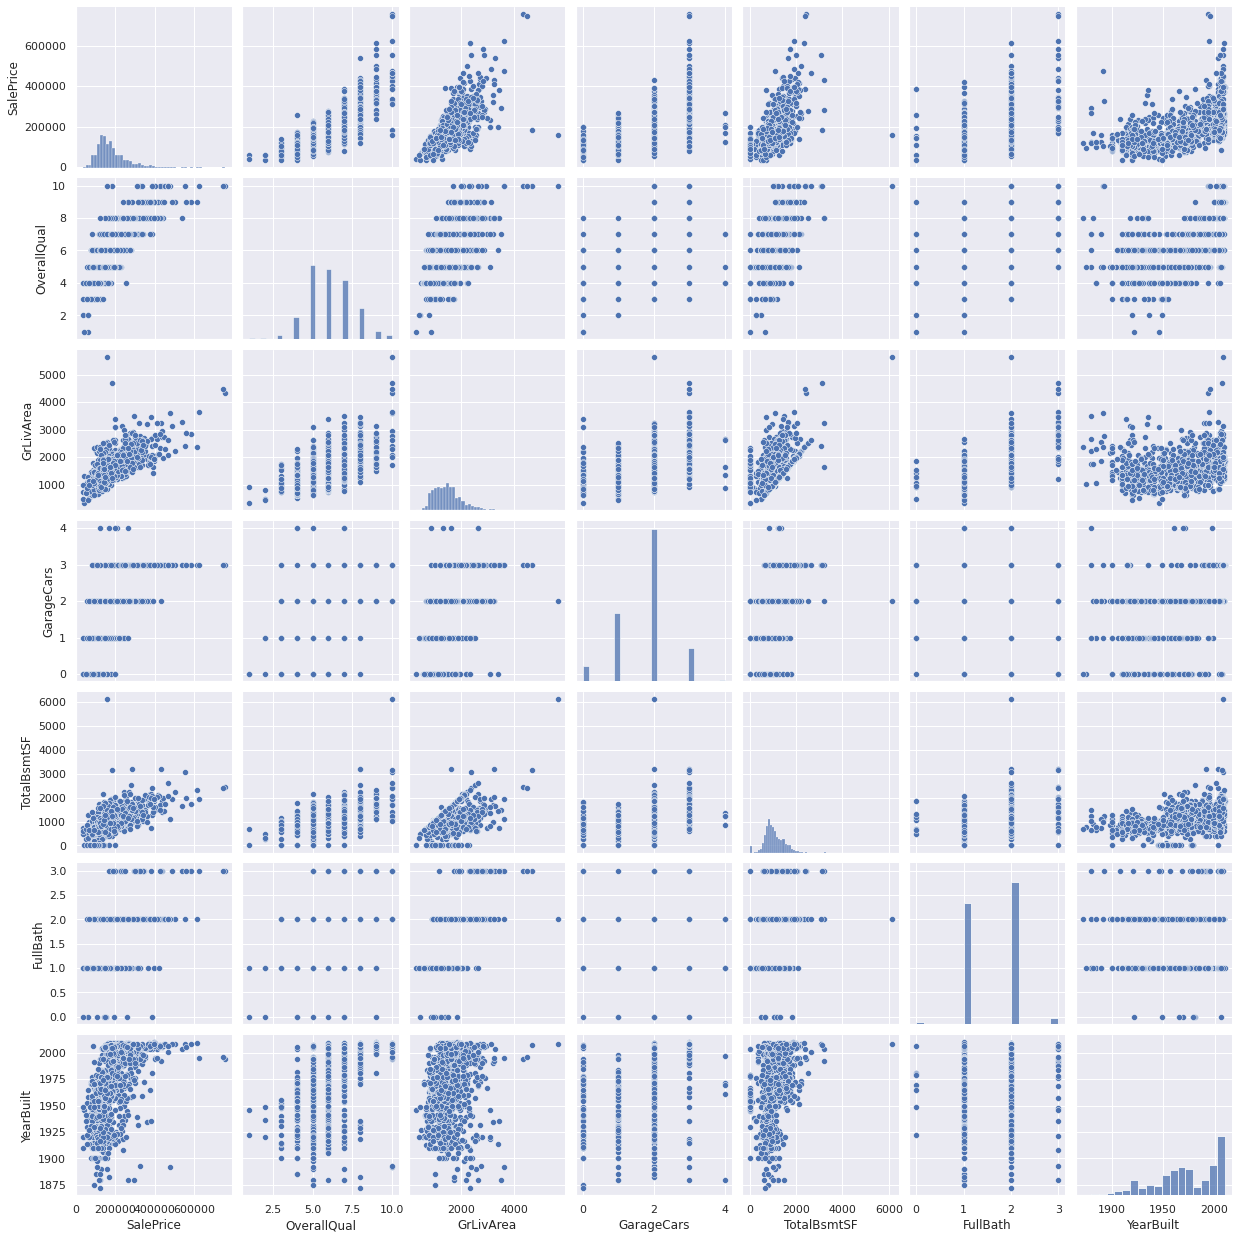

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)

In [ ]:
def grid_plot(dataframe, list_of_variable):
    g = sns.PairGrid(dataframe, vars=list_of_variable)
    g.map(plt.scatter, alpha=0.8)

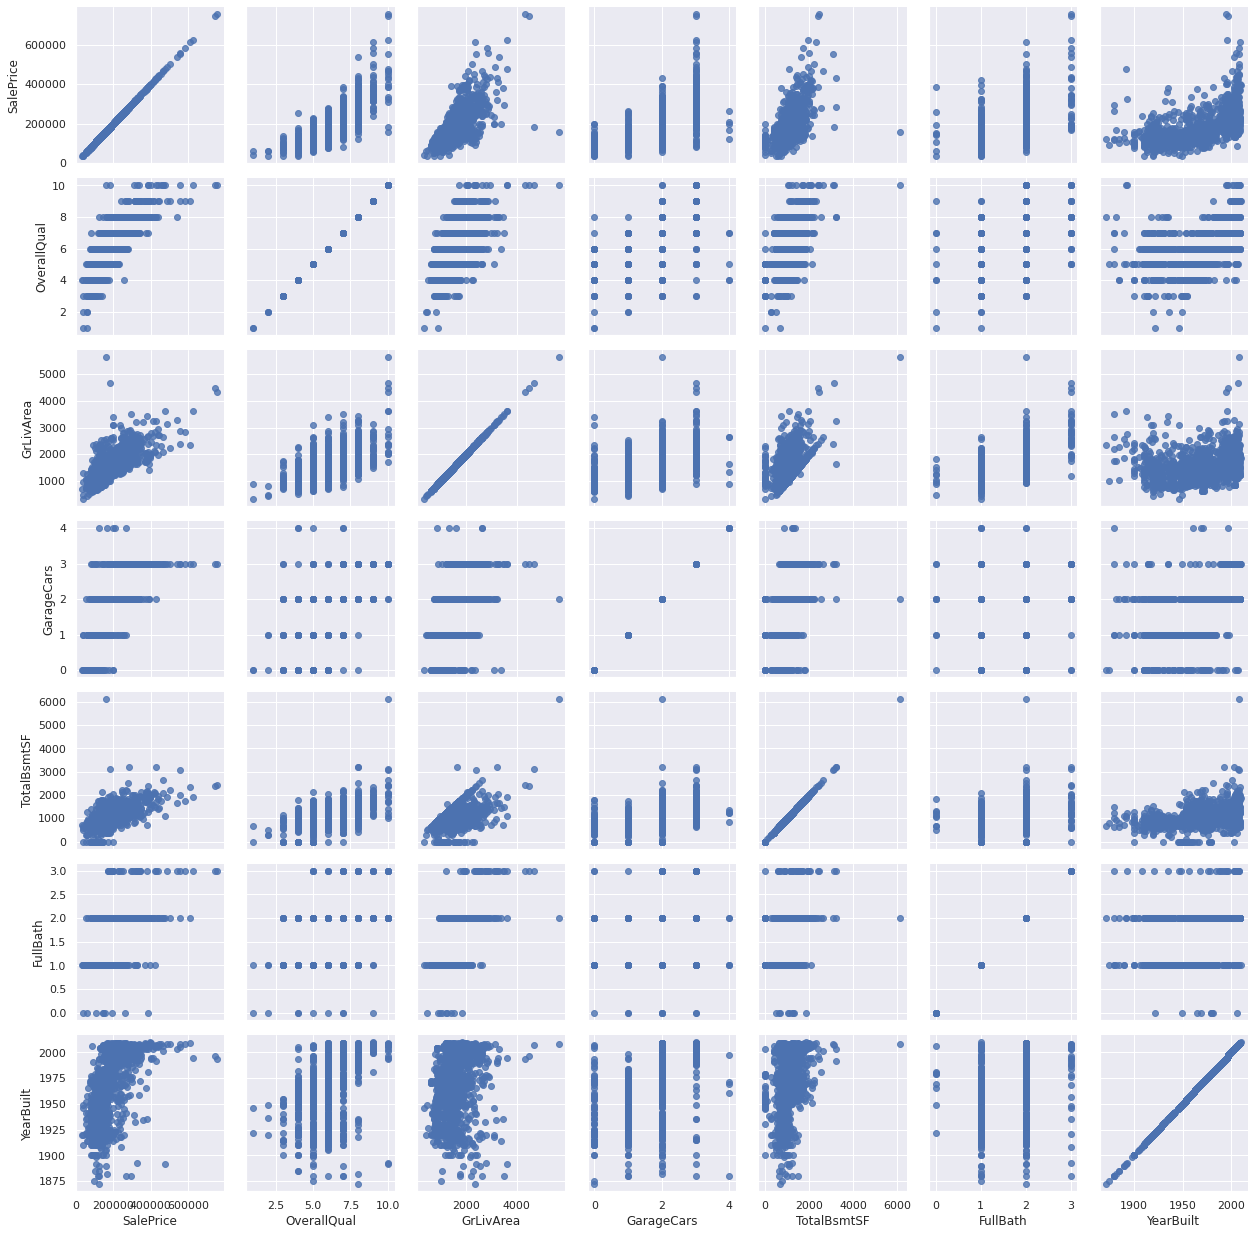

In [ ]:
vars = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
grid_plot(df_train, vars)  

## **Deal With Missing Data**

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageQual,81,0.055479


Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'Garage*X*' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20$ in 5$ problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'Garage*X*' variables. The same logic applies to 'Bsmt*X*' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [ ]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

### Outliers

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

#### Univartiate Analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [ ]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


How 'SalePrice' looks with her new clothes:

* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

#### Bivariate Analysis

We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


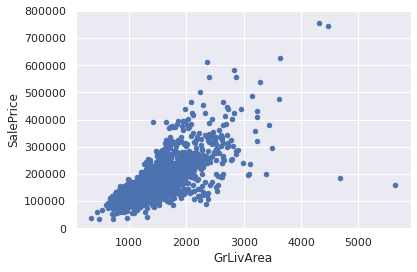

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

What has been revealed:

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [ ]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


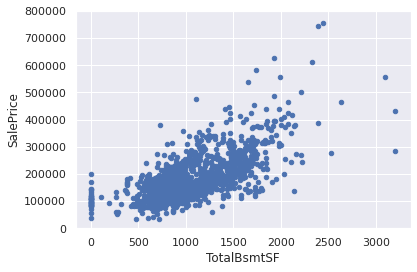

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

## **Getting Hardcore**

Who is 'SalePrice'? The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to [Hair et al. (2013)](https://amzn.to/2uC3j9p), four assumptions should be tested:

* <b>Normality</b> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely  on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* <b>Homoscedasticity</b> - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' [(Hair et al., 2013)](https://amzn.to/2uC3j9p). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* <b>Linearity</b>- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* <b>Absence of correlated errors</b> - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

### In the search of normality

The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

* <b>Histogram</b> - Kurtosis and skewness.
* <b>Normal probability plot</b> - Data distribution should closely follow the diagonal that represents the normal distribution.

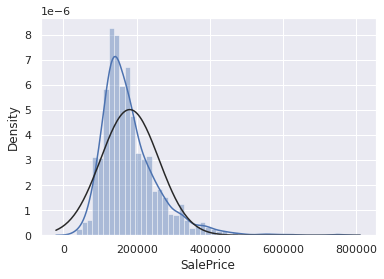

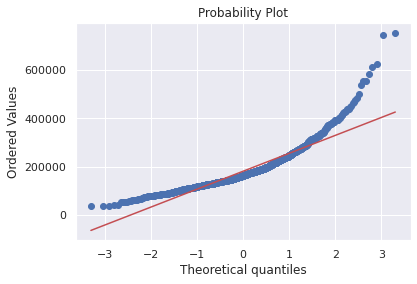

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line. But everything's not lost. A simple data transformation can solve the problem.

In [ ]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

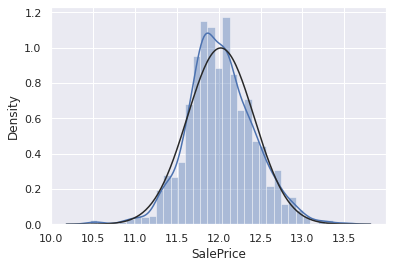

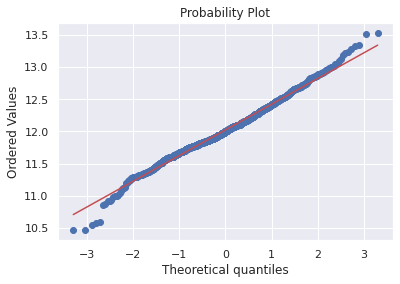

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Done! Let's check what's going on with 'GrLivArea'.

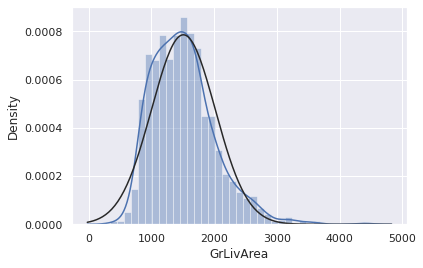

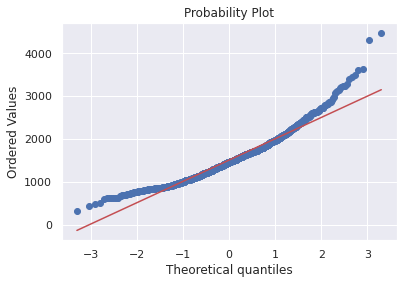

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [ ]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

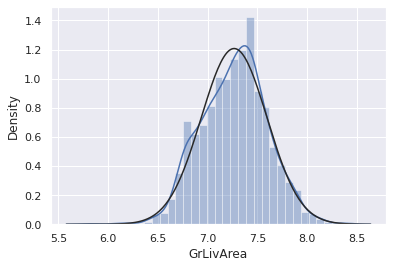

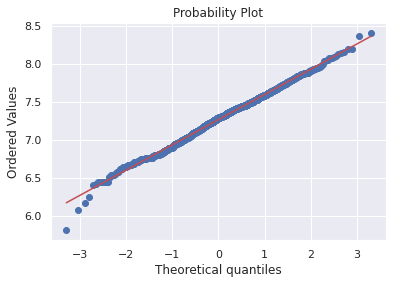

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Lastly,

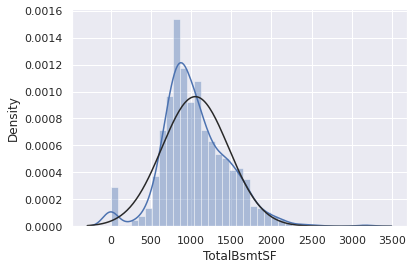

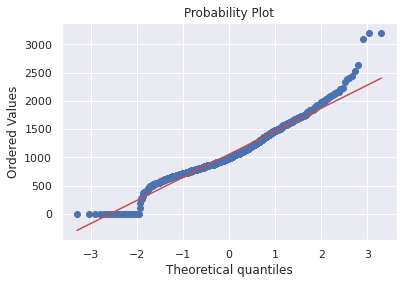

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

What do we have here?

* Something that, in general, presents skewness.
* A significant number of observations with value zero (houses without basement).
* A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

In [ ]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [ ]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

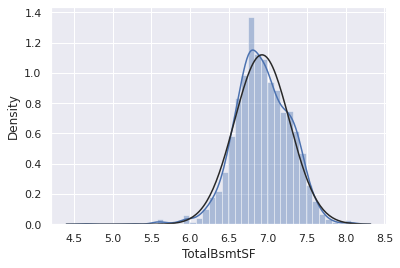

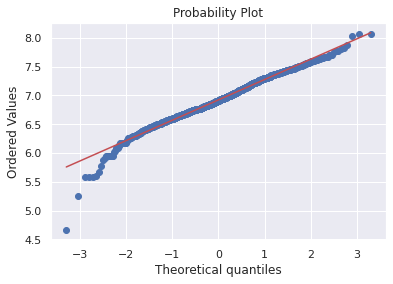

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### In the search for writing 'homoscedasticity' right at the first attempt

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'

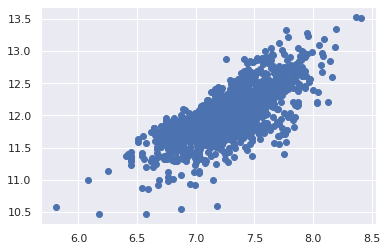

In [ ]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

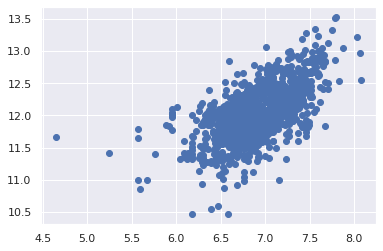

In [ ]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. 

### Lastly: Dummy Variables

In [ ]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

## **Conclusion**

That's it! We reached the end of our exercise.

Throughout this kernel we put in practice many of the strategies proposed by [Hair et al. (2013)](https://amzn.to/2uC3j9p). We philosophied about the variables, we analysed 'SalePrice' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. 